In [69]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
import missingno as msno

In [70]:
pd.set_option('display.max_columns', None)
df_brisbane = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\brisbane_weather_2014-2024.csv")

In [71]:
#sort index
df_brisbane = df_brisbane.sort_index()
columns_to_drop = ['Unnamed: 0']
df_brisbane = df_brisbane.drop(columns=columns_to_drop)

1. drop the Unnamed column cause it skewes the data in a weird way

## Descriptive statistics and EDA

In [72]:
df_brisbane.shape

(3793, 33)

In [73]:
df_brisbane.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [74]:
df_brisbane['datetime'].min()

'2014-01-01'

In [75]:
df_brisbane['datetime'].max()

'2024-05-20'

In [76]:
df_brisbane['temp'].min()

10.9

In [77]:
df_brisbane['temp'].max()

30.1

In [78]:
df_brisbane.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [79]:
df_brisbane.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1768
snow                 365
snowdepth            365
windgust             320
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [80]:
print(df_brisbane.head())

                  name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  Brisbane, Australia  2014-01-01     29.2     21.9  25.1          29.6   
1  Brisbane, Australia  2014-01-02     29.7     20.9  25.3          31.3   
2  Brisbane, Australia  2014-01-03     32.5     22.8  27.5          36.1   
3  Brisbane, Australia  2014-01-04     35.8     24.6  29.2          41.3   
4  Brisbane, Australia  2014-01-05     31.5     23.8  26.8          35.8   

   feelslikemin  feelslike   dew  humidity  precip  precipprob  precipcover  \
0          21.9       25.3  18.1      66.5   0.000           0         0.00   
1          20.9       25.9  18.9      68.5   0.000           0         0.00   
2          22.8       29.6  21.8      72.1   0.224         100         8.33   
3          24.6       31.7  22.0      66.3   0.001         100         4.17   
4          23.8       28.2  21.5      73.3   0.000           0         0.00   

  preciptype  snow  snowdepth  windgust  windspeed  winddir  sealeve

In [81]:
print(df_brisbane.describe())

           tempmax      tempmin         temp  feelslikemax  feelslikemin  \
count  3793.000000  3793.000000  3793.000000   3793.000000   3793.000000   
mean     25.971553    16.629212    20.991774     26.516979     16.489349   
std       3.700526     4.701657     3.945405      4.444640      4.983609   
min      12.500000     3.300000    10.900000     12.500000      1.100000   
25%      23.000000    12.900000    17.700000     23.000000     12.900000   
50%      26.000000    16.900000    21.300000     26.000000     16.900000   
75%      28.800000    20.600000    24.300000     29.600000     20.600000   
max      38.500000    27.100000    30.100000     45.000000     31.100000   

         feelslike          dew     humidity       precip   precipprob  \
count  3793.000000  3793.000000  3793.000000  3793.000000  3793.000000   
mean     21.166359    14.701925    69.815713     2.550509    50.329554   
std       4.262468     5.229338    10.871549    10.972094    50.005506   
min       9.600000 

In [82]:
print(df_brisbane.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3793 non-null   object 
 1   datetime          3793 non-null   object 
 2   tempmax           3793 non-null   float64
 3   tempmin           3793 non-null   float64
 4   temp              3793 non-null   float64
 5   feelslikemax      3793 non-null   float64
 6   feelslikemin      3793 non-null   float64
 7   feelslike         3793 non-null   float64
 8   dew               3793 non-null   float64
 9   humidity          3793 non-null   float64
 10  precip            3793 non-null   float64
 11  precipprob        3793 non-null   int64  
 12  precipcover       3793 non-null   float64
 13  preciptype        2025 non-null   object 
 14  snow              3428 non-null   float64
 15  snowdepth         3428 non-null   float64
 16  windgust          3473 non-null   float64


In [83]:
print(df_brisbane.isnull().sum())

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1768
snow                 365
snowdepth            365
windgust             320
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


In [84]:
df_brisbane.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

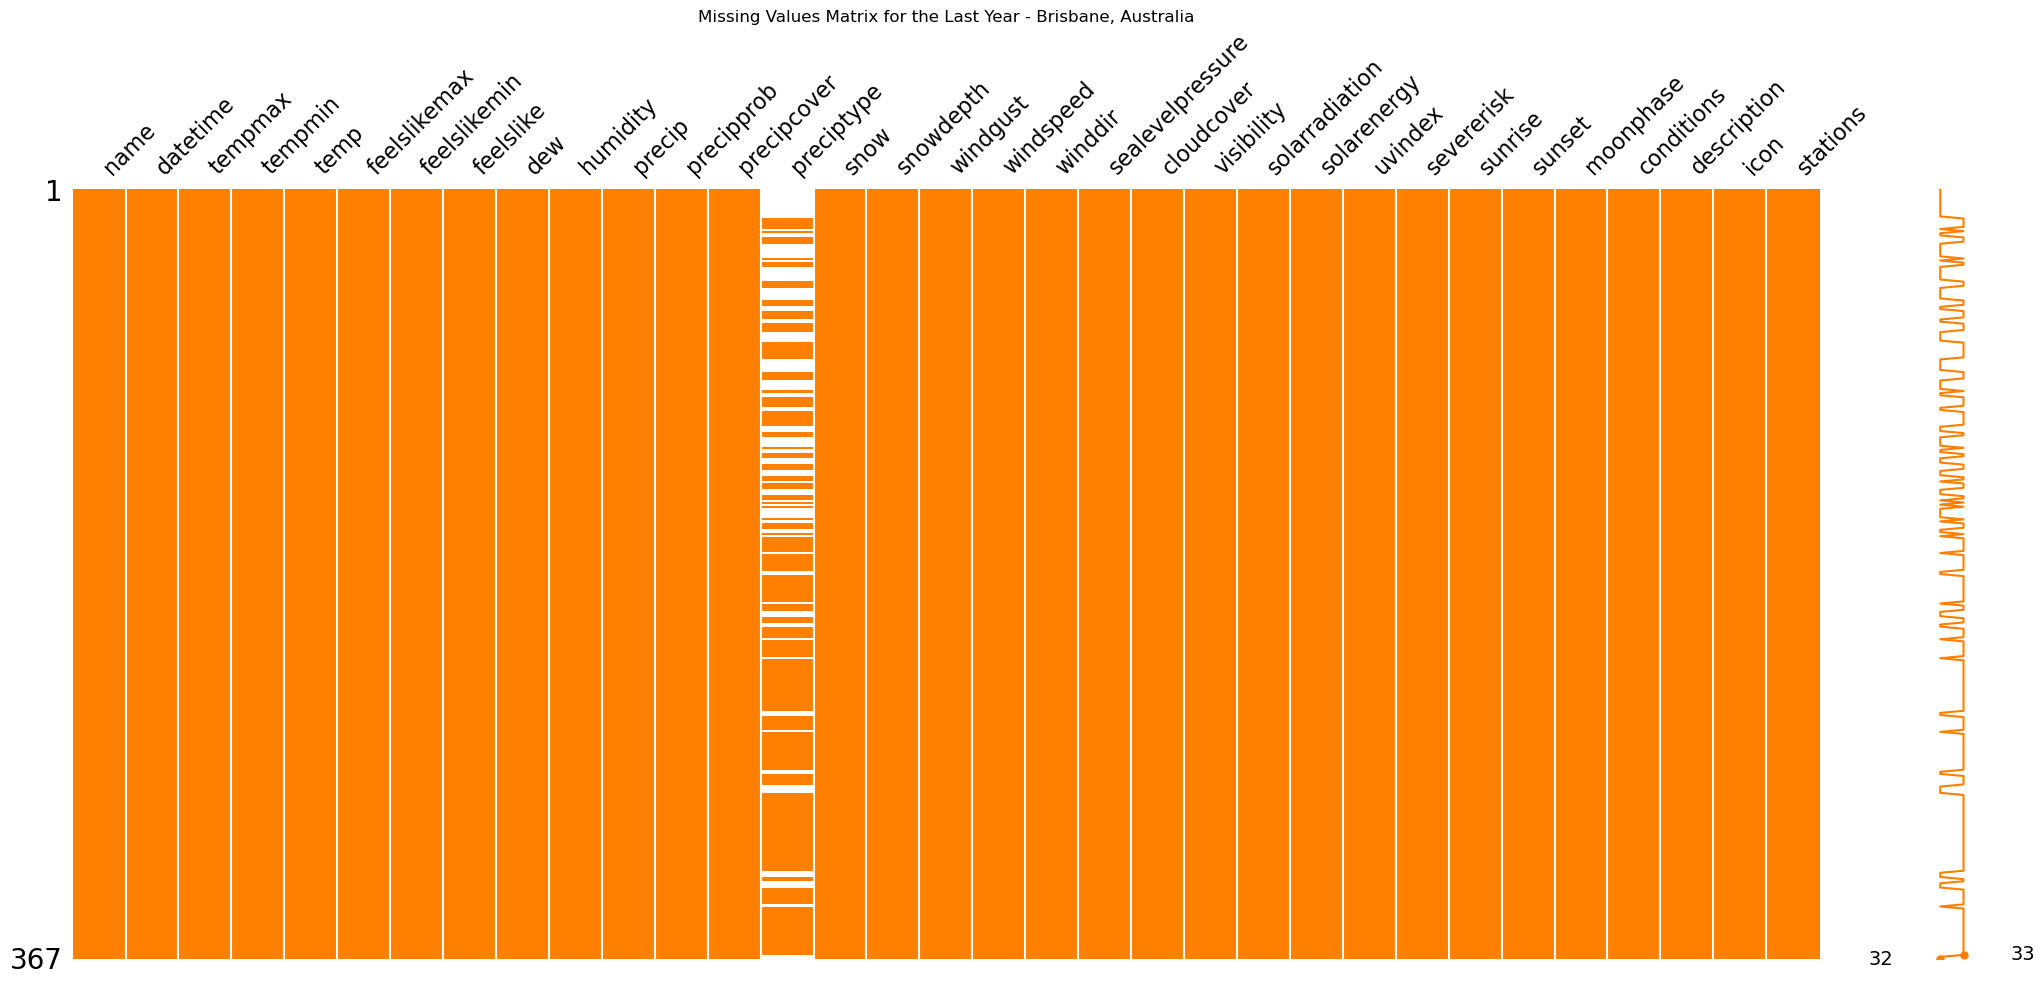

In [85]:
df_brisbane['datetime'] = pd.to_datetime(df_brisbane['datetime'])

last_year = df_brisbane['datetime'].max() - pd.DateOffset(years=1)
df_last_year = df_brisbane[df_brisbane['datetime'] >= last_year]

msno.matrix(df_last_year, color=(1.0, 0.5, 0.0))
plt.title('Missing Values Matrix for the Last Year - Brisbane, Australia')
plt.show()

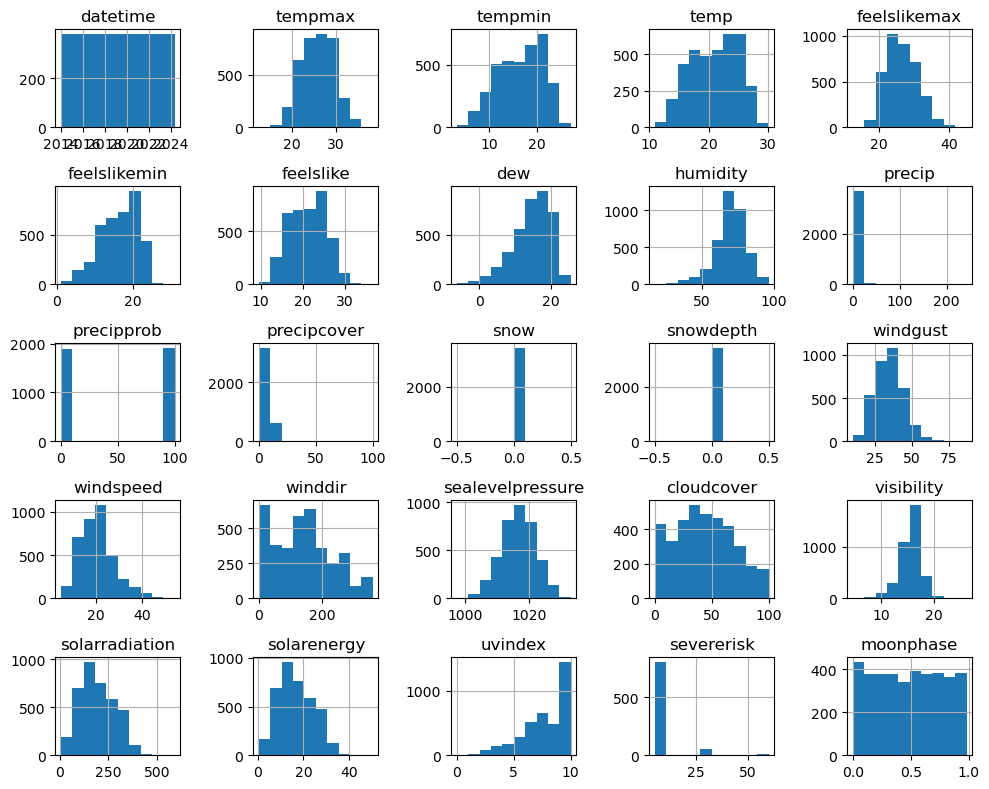

In [86]:
df_brisbane.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

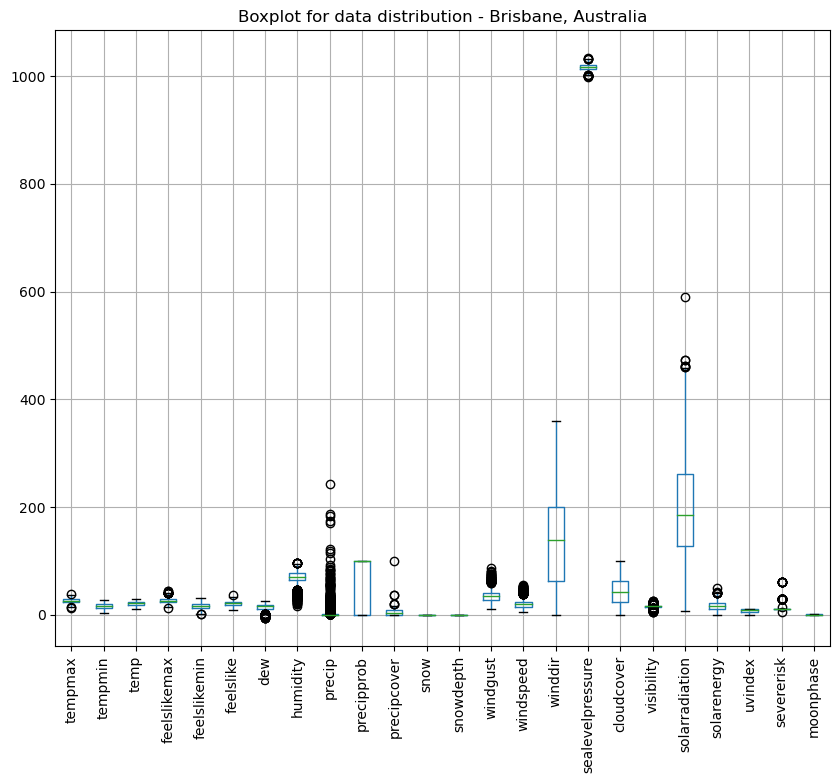

In [87]:
df_brisbane.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Boxplot for data distribution - Brisbane, Australia')
plt.show()

In [88]:
corr_matrix = df_brisbane.corr()
print(corr_matrix) 

                   tempmax   tempmin      temp  feelslikemax  feelslikemin  \
tempmax           1.000000  0.772152  0.912475      0.972679      0.764427   
tempmin           0.772152  1.000000  0.950382      0.800615      0.995731   
temp              0.912475  0.950382  1.000000      0.916863      0.944808   
feelslikemax      0.972679  0.800615  0.916863      1.000000      0.789210   
feelslikemin      0.764427  0.995731  0.944808      0.789210      1.000000   
feelslike         0.911615  0.947167  0.995961      0.931880      0.941549   
dew               0.692365  0.880385  0.838049      0.740352      0.879182   
humidity          0.043031  0.318450  0.178994      0.118663      0.325069   
precip           -0.022396  0.148304  0.074641      0.004335      0.146287   
precipprob        0.030413  0.316639  0.188029      0.074062      0.320523   
precipcover      -0.022932  0.309596  0.159706      0.024734      0.311506   
snow                   NaN       NaN       NaN           NaN    

C:\Users\nicol\AppData\Local\Temp\ipykernel_28736\3441150083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_brisbane.corr()


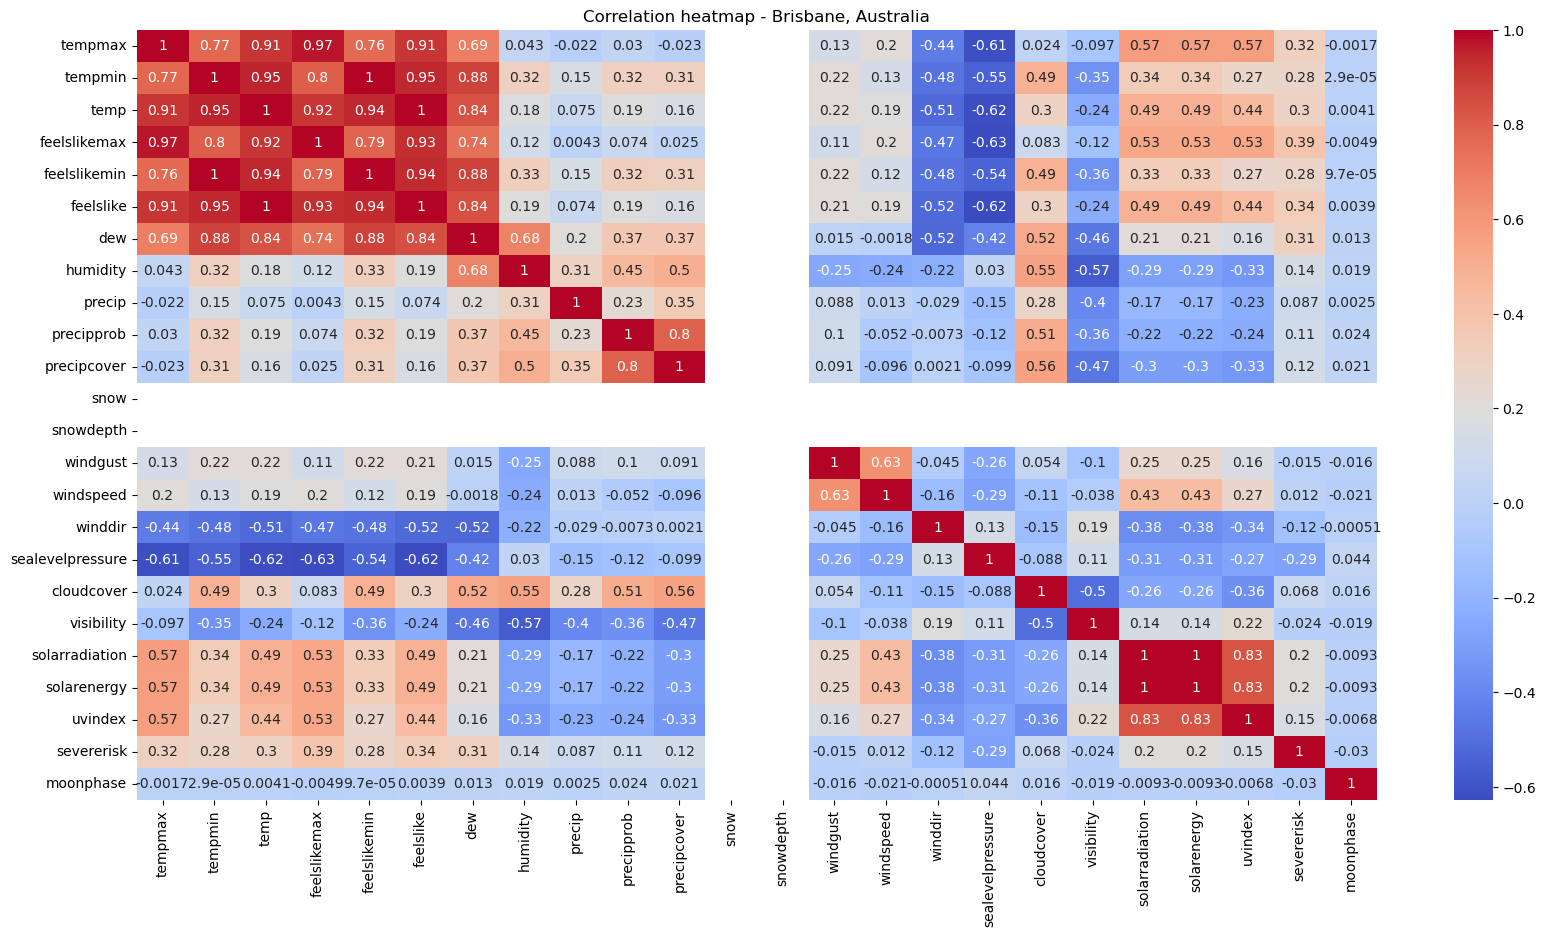

In [89]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap - Brisbane, Australia")
plt.show()

look into the correlation that humidity has with temp (-0.43) + solarradiation, solarenergy or uvindex
look into multicolinearity - multiple feature that are roughly the same as the target, which need to be removed (first 5 after the first one)

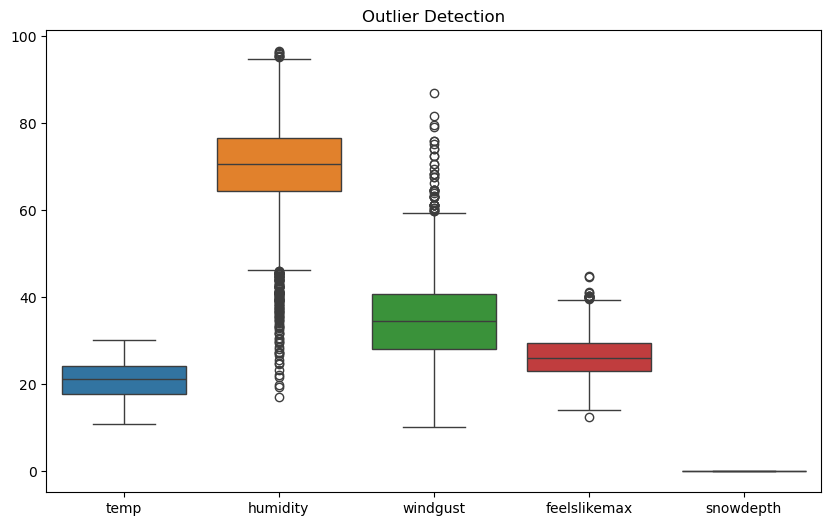

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_brisbane[['temp', 'humidity', 'windgust', 'feelslikemax', 'snowdepth']])
plt.title("Outlier Detection")
plt.show()

In [91]:
# look into how each of these are measured 
# for example temp is the average at 18 
#first run the models with outliers and then see the results 

## Missing values

In [92]:
df_brisbane.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1768
snow                 365
snowdepth            365
windgust             320
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [93]:
#run k-nn to fill in the missing values with the k nearest neighbour 
#https://www.sciencedirect.com/science/article/abs/pii/S0164121212001586#:~:text=kNN%20imputation%20is%20designed%20to,or%20attribute)%20is%20categorical%2C%20referred

imputer = KNNImputer(n_neighbors=5)
df_brisbane[['windgust', 'severerisk']] = imputer.fit_transform(df_brisbane[['windgust', 'severerisk']])


In [94]:
df_brisbane.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1768
snow                 365
snowdepth            365
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [95]:
#filling in missing values from precipitation and snow because if they are missing, it means there was no registration of snow or precipitation that day

df_brisbane['preciptype'] = df_brisbane['preciptype'].fillna(0)
df_brisbane['snow'] = df_brisbane['snow'].fillna(0)
df_brisbane['snowdepth'] = df_brisbane['snowdepth'].fillna(0)

In [96]:
df_brisbane.isna().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

## Droppping unnecessary columns

In [97]:
# based on the heatmap, it seems that columns like tempmax, tempin, feelslikemax, feelslikemin and feelslike are too similar with the target variable and they are being dropped as to not create any data leakage in the models to follow

In [98]:
# reference multi colinearity

In [99]:
columns_to_drop = ['tempmax', 'tempmin', 'icon', 'stations', 'conditions', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike']
df_brisbane = df_brisbane.drop(columns=columns_to_drop)

## Tokenization of the "description" column

In [100]:
# step 1: text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

In [101]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [102]:
# fitting the model on the 'description' column
text_features = pipeline.fit_transform(df_brisbane['description'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [103]:
kmeans.labels_
df_brisbane['clusters_description'] = kmeans.labels_

In [104]:
df_brisbane['clusters_description'].value_counts()

0    1987
2    1048
1     758
Name: clusters_description, dtype: int64

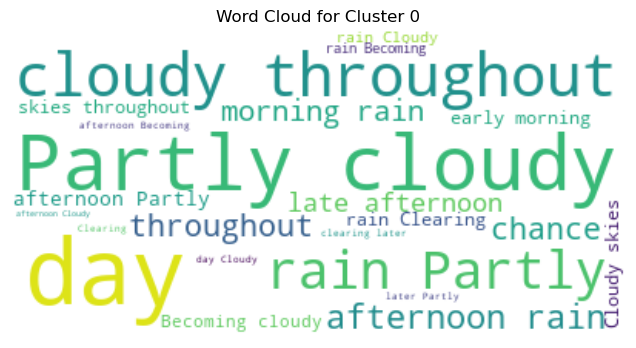

In [105]:
text = ' '.join(description for description in df_brisbane[df_brisbane['clusters_description']==0]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0')
plt.show()

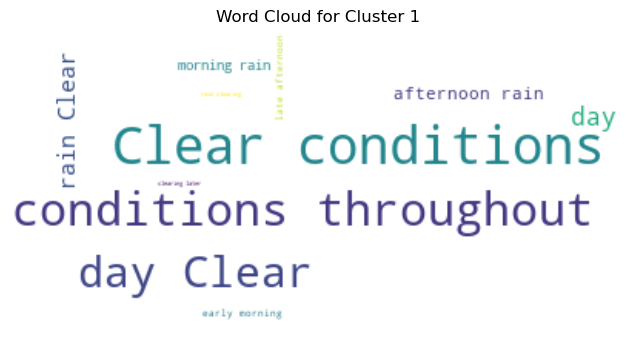

In [106]:
text = ' '.join(description for description in df_brisbane[df_brisbane['clusters_description']==1]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 1')
plt.show()

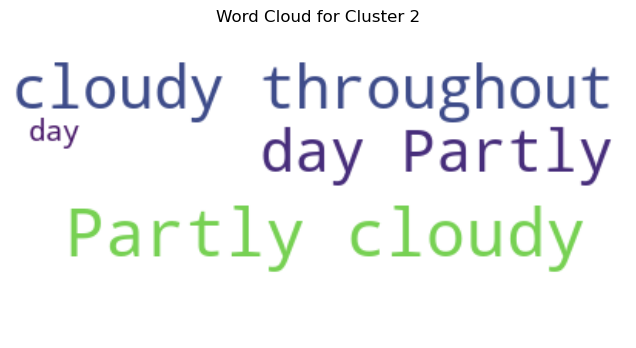

In [107]:
text = ' '.join(description for description in df_brisbane[df_brisbane['clusters_description']==2]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 2')
plt.show()

In [108]:
df_brisbane = df_brisbane.drop(columns=['description'])
df_brisbane.head(2)

,name,datetime,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,clusters_description
0,"Brisbane, Australia",2014-01-01,25.1,18.1,66.5,0.0,0,0.0,0,0.0,0.0,34.86634,23.3,93.5,1013.7,47.9,12.9,374.5,32.4,10,11.740139,2014-01-01T04:55:58,2014-01-01T18:46:25,0.00,0
1,"Brisbane, Australia",2014-01-02,25.3,18.9,68.5,0.0,0,0.0,0,0.0,0.0,34.86634,28.3,10.8,1010.3,58.9,13.5,343.8,29.7,10,11.740139,2014-01-02T04:56:39,2014-01-02T18:46:40,0.02,2


## Download of updated dataframe

In [109]:
# folder_path = r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data'
# file_name = 'brisbane_weather_2014-2024_updated.csv'
# full_path = os.path.join(folder_path, file_name)

# # save the DataFrame to the specified path
# df_brisbane.to_csv(full_path)